<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." </p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        
    </ul>
<p>
     <centre> Lets get started  </strong>
</p>
</div>

<hr>


In [1]:
!pip install yfinance
#!pip install pandas

     |████████████████████████████████| 6.4 MB 35.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# installing libraries
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, for this example, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need.


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [4]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.2101394,
 'SandP52WeekChange': 0.17114937,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 1400,
 'averageDailyVolume10Day': 102613990,
 'averageVolume': 97557865,
 'averageVolume10days': 102613990,
 'beta': 1.202736,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 1800,
 'bookValue': 3.841,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 159.22,
 'currentRatio': 1.075,
 'dateShortInterest': 1642118400,
 'dayHigh': 163.84,
 'dayLow': 158.28,
 'debtToEquity': 216.392,
 'dividendRate': 0.88,
 'dividendYield': 0.0055,
 'earningsGrowth': 0.662,
 'earningsQuarterlyGrowth': 0.622,
 'ebitda': 120233000960,
 'ebitdaMargins': 0.32867,
 'enterpriseToEbitda': 22.341,
 'enterpriseToRevenue': 7.343,
 'enterpriseValue': 2686109614080,
 'exDividendDate': 1636070400,
 'exchange': 'N

We can get the <code>'country'</code> using the key country


In [5]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [12]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [13]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [8]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


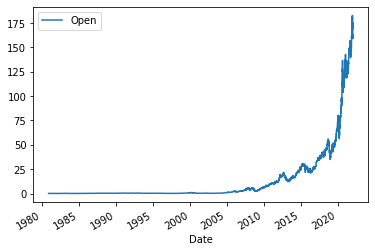

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
Name: Dividends, Length: 73, dtype: float64

We can plot the dividends overtime:


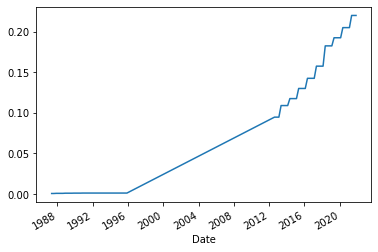

In [11]:
apple.dividends.plot()